In [ ]:
!kaggle datasets download -d bilalakgz/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/bilalakgz/brain-tumor-mri-dataset
License(s): MIT
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import zipfile
import os
import PIL
from PIL import Image

In [ ]:
zip_file_path = '/content/brain-tumor-mri-dataset.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall('/content/')

In [ ]:
# Function to display image with filename for verification purposes
def display_image(image_path):
  img = Image.open(image_path)
  row_index = df.index[df['Image File'] == image_path].tolist()[0]  # Get the row index
  classification = df.loc[row_index, 'Classification'] # Use row_index for iloc
  width, height = img.size
  print(f"Image Size: {width}x{height}")

  plt.imshow(img)
  plt.title(classification)  # Set title as filename
  plt.axis('off')
  plt.show()

In [ ]:
#Creating a function to map the image paths and their respective classes
def create_table(directory):
    #Create empty lists to store image paths and their classifications
    image_paths = []
    class_names = []

    #Iterate through each folder (class) in the base directory
    for class_folder in os.listdir(directory):
        class_folder_path = os.path.join(directory, class_folder)

        #Check if the item is a folder
        if os.path.isdir(class_folder_path):
            #Iterate through each image file in the class folder
            for file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, file)

                #If it's a file, add it to the lists
                if os.path.isfile(image_path):
                    image_paths.append(image_path)
                    class_names.append(class_folder)  #Use the folder name as the class label

    #Create a DataFrame from the lists
    df = pd.DataFrame({
        "Image File": image_paths,
        "Classification": class_names
    })

    return df

In [ ]:
#Creating a DataFrame for both original training and testing datasets
training_df = create_table("/content/brain_tumor_dataset/brain_tumor_classification/Training")
testing_df = create_table("/content/brain_tumor_dataset/brain_tumor_classification/Testing")

#Merge training and testing datasets together due to bad ratio (88:12)
df = pd.concat([training_df, testing_df], ignore_index=True)
df.head()

,Image File,Classification
0,/content/brain_tumor_dataset/brain_tumor_class...,meningioma_tumor
1,/content/brain_tumor_dataset/brain_tumor_class...,meningioma_tumor
2,/content/brain_tumor_dataset/brain_tumor_class...,meningioma_tumor
3,/content/brain_tumor_dataset/brain_tumor_class...,meningioma_tumor
4,/content/brain_tumor_dataset/brain_tumor_class...,meningioma_tumor


In [ ]:
#Renaming classification labels to improve readability
df['Classification'] = df['Classification'].replace({'glioma_tumor': 'Glioma Tumor', 'meningioma_tumor': 'Meningioma Tumor',
                                                               'pituitary_tumor': 'Pituitary Tumor', 'no_tumor': 'No Tumor'})
df.head()

,Image File,Classification
0,/content/brain_tumor_dataset/brain_tumor_class...,Meningioma Tumor
1,/content/brain_tumor_dataset/brain_tumor_class...,Meningioma Tumor
2,/content/brain_tumor_dataset/brain_tumor_class...,Meningioma Tumor
3,/content/brain_tumor_dataset/brain_tumor_class...,Meningioma Tumor
4,/content/brain_tumor_dataset/brain_tumor_class...,Meningioma Tumor


Image Size: 512x512


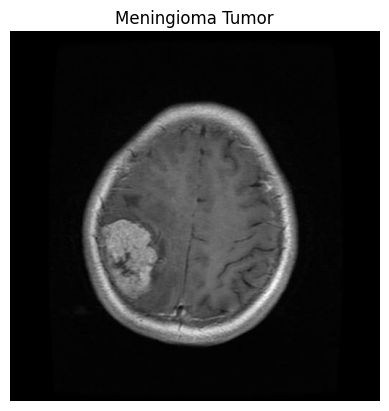

In [ ]:
display_image(df.loc[500, 'Image File'])

In [ ]:
img_height = 128
img_width = 128

In [ ]:
image_data = []
# Update image_dir to the correct path
for image_path in df['Image File']:
  # Create the full path by joining the directory and filename
  img = Image.open(image_path).convert('L')
  img = img.resize((img_width, img_height))
  img_array = np.array(img)
  image_data.append(img_array)

In [ ]:
image_data = np.array(image_data)
image_data = image_data / 255.0

In [ ]:
image_data[1]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00392157, ..., 0.00784314, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.01176471, ..., 0.01568627, 0.00392157,
        0.        ],
       [0.        , 0.        , 0.00392157, ..., 0.00784314, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
train_images, temp_images, train_labels, temp_labels = train_test_split(image_data, df['Classification'], test_size=0.2, random_state=42)

print("Train images shape:", train_images.shape)
print("Temporary images shape:", temp_images.shape)
print("Train labels shape:", train_labels.shape)
print("Temporary labels shape:", temp_labels.shape)

Train images shape: (2611, 128, 128)
Temporary images shape: (653, 128, 128)
Train labels shape: (2611,)
Temporary labels shape: (653,)


In [ ]:
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Validation labels shape:", val_labels.shape)
print("Test labels shape:", test_labels.shape)

Validation images shape: (326, 128, 128)
Test images shape: (327, 128, 128)
Validation labels shape: (326,)
Test labels shape: (327,)


In [ ]:
unique_test_labels_counts = test_labels.value_counts()
print(unique_test_labels_counts)

Classification
Meningioma Tumor    114
Glioma Tumor         84
Pituitary Tumor      83
No Tumor             46
Name: count, dtype: int64


In [ ]:
#Initialize LabelEncoder to convert target labels from categorical to numerical values
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
test_labels_encoded = label_encoder.transform(test_labels)

#Verify if the training, validation, and testing sets are perfectly divided
print("Train images shape:", train_images.shape)
print("Validation images shape:", val_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels_encoded.shape)
print("Validation labels shape:", val_labels_encoded.shape)
print("Test labels shape:", test_labels_encoded.shape)

Train images shape: (2611, 128, 128)
Validation images shape: (326, 128, 128)
Test images shape: (327, 128, 128)
Train labels shape: (2611,)
Validation labels shape: (326,)
Test labels shape: (327,)


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1))) #First Convolutional Layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu')) #Second Convolutional Layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu')) #Third Convolutional Layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu')) #Fourth Convolutional Layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))  #Reduce Overfitting

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) #First Fully Connected Layer
model.add(layers.Dense(4, activation = 'softmax')) #Second Fully Connected Layer

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 126, 126, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,909,764 (14.91 MB)

 Trainable params: 3,909,764 (14.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_encoded, epochs=30, batch_size = 64,
                    validation_data=(val_images, val_labels_encoded))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 140ms/step - accuracy: 0.3671 - loss: 1.2901 - val_accuracy: 0.5613 - val_loss: 1.0801
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6225 - loss: 0.8783 - val_accuracy: 0.7301 - val_loss: 0.7210
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7497 - loss: 0.6104 - val_accuracy: 0.7607 - val_loss: 0.6656
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7810 - loss: 0.5200 - val_accuracy: 0.7577 - val_loss: 0.6341
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8621 - loss: 0.3780 - val_accuracy: 0.7914 - val_loss: 0.6071
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.8906 - loss: 0.2898 - val_accuracy: 0.8466 - val_loss: 0.5022
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9203 - loss: 0.2139 - val_accuracy: 0.8650 - val_loss: 0.4817
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9615 - loss: 0.1146 - val_accuracy: 0.8773 - val_loss: 0

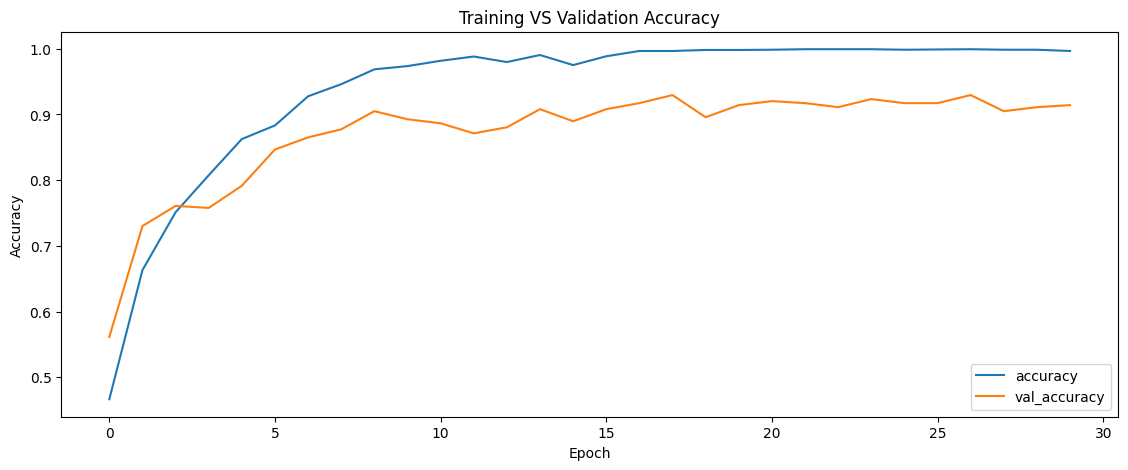

In [ ]:
#Plot Training VS Validation Accuracy Graph
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training VS Validation Accuracy')
plt.show()

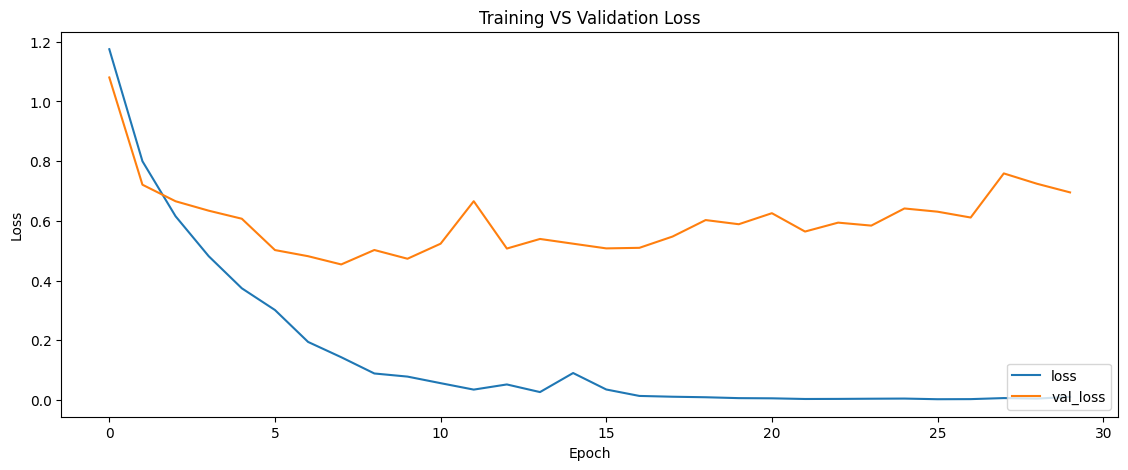

In [ ]:
#Plot Training VS Validation Loss Graph
plt.figure(figsize=(30,5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.title('Training VS Validation Loss')
plt.show()

In [ ]:
#Evaluate the trained model on the testing set
test_loss, test_acc = model.evaluate(test_images, test_labels_encoded, verbose=2)

11/11 - 1s - 129ms/step - accuracy: 0.9113 - loss: 0.5813


In [ ]:
print(f"Test Accuracy: {test_acc * 100:2f}%")
print(f"Test Loss: {test_loss * 100:2f}%")

Test Accuracy: 91.131496%
Test Loss: 58.129507%


In [ ]:
pred_labels = model.predict(test_images)
pred_labels = np.argmax(pred_labels, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [ ]:
target_labels = label_encoder.classes_
print(target_labels)

['Glioma Tumor' 'Meningioma Tumor' 'No Tumor' 'Pituitary Tumor']


Accuracy: 91.131498%


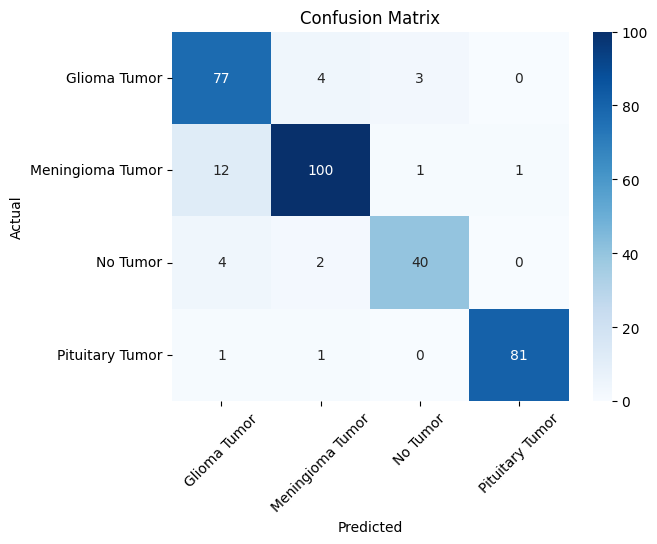

In [ ]:
accuracy = accuracy_score(test_labels_encoded, pred_labels)
print(f'Accuracy: {accuracy * 100:2f}%')

#Plot a Confusion Matrix to Visualize Results
conf_matrix = confusion_matrix(test_labels_encoded, pred_labels)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_labels, yticklabels=target_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Create a classification report to show precision, recall and f1-score
class_report = classification_report(test_labels_encoded, pred_labels, target_names=target_labels)
print(class_report)

                  precision    recall  f1-score   support

    Glioma Tumor       0.82      0.92      0.87        84
Meningioma Tumor       0.93      0.88      0.90       114
        No Tumor       0.91      0.87      0.89        46
 Pituitary Tumor       0.99      0.98      0.98        83

        accuracy                           0.91       327
       macro avg       0.91      0.91      0.91       327
    weighted avg       0.91      0.91      0.91       327

